In [ ]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
    
os.environ["TRANSFORMERS_NO_TF"] = "1"

from copy import deepcopy
import pandas as pd
import json 
from collections import OrderedDict
from underthesea import sent_tokenize
import re
import unicodedata
from collections import OrderedDict

# from rag_model.model.RE.final_re import RE
# from rag_model.model.NER.final_ner import NER
# from shared_functions.gg_sheet_drive import *
# from shared_functions.global_functions import *
# from rag_model.model.Final_pipeline.final_relation_extractor import *
# from rag_model.model.Final_pipeline.final_doc_processor import *

d:\miniconda3\envs\phobert_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# from vncorenlp import VnCoreNLP

# ner_annotator = None
# # ner_annotator = VnCoreNLP("D:/Study/Education/Projects/Group_Project/VnCoreNLP/VnCoreNLP-1.1.1.jar", annotators="wseg,pos,ner", max_heap_size='-Xmx2g') 

# with open('D:/Study/Education/Projects/Group_Project/rag_model/model/RE/artifact/id2relation.json', 'r') as f:
#     id2relation = json.load(f)

# ner = NER(
#     model_path="D:/Study/Education/Projects/Group_Project/rag_model/model/NER/artifact/model_bilstm_crf.pt",
#     token2idx_path="D:/Study/Education/Projects/Group_Project/rag_model/model/NER/artifact/token2idx.json",
#     label2idx_path="D:/Study/Education/Projects/Group_Project/rag_model/model/NER/artifact/label2idx.json",
#     annotator = ner_annotator
# )

# re_model = RE(checkpoint = 'D:/Study/Education/Projects/Group_Project/rag_model/model/RE/artifact/re_8_train_phobert_1_3.pth',
#            use_phobert=True, id2relation=id2relation, encoder_layer=1, decoder_layer=3, use_rel_pos=False, freeze_train=True) #match the model configuration

# final_re = Extractor(ner, re_model)

# processor = Doc_processor(ner, re_model, final_re)

In [39]:
list_drive_files()

├── Luật
│   ├── luat_16_2023_QH15_519324.pdf
│   ├── luat_22_2023_QH15_518805.pdf
│   ├── luat_31_2024_QH15_523642.pdf
│   ├── luat_33_2024_QH15_545181.pdf
│   ├── luat_38_2019_QH14_387595.pdf
│   ├── luat_39_2024_QH15_575158.pdf
│   ├── luat_46_2024_QH15_524982.pdf
│   ├── luat_48_2024_QH15_556390.pdf
│   ├── luat_50_2024_QH15_445264.pdf
│   ├── luat_60_2024_QH15_621343.pdf
│   ├── luat_61_2024_QH15_613892.pdf
│   ├── luat_66_2025_QH15_621225.pdf
│   ├── luat_67_2025_QH15_580594.pdf
│   ├── luat_90_2025_QH15_662379.pdf
│   └── luat_97_2015_QH13_298376.pdf
├── Nghị quyết
│   ├── nghi_quyet_01_2020_NQ-HDND_448623.pdf
│   ├── nghi_quyet_01_2025_NQ-HDND_642122.pdf
│   ├── nghi_quyet_01_2025_NQ-HDND_666755.pdf
│   ├── nghi_quyet_02_2025_NQ-HDND_650773.pdf
│   ├── nghi_quyet_04_2025_NQ-HDND_662868.pdf
│   ├── nghi_quyet_04_2025_NQ-HDND_676671.pdf
│   ├── nghi_quyet_05_2025_NQ-HDND_667873.pdf
│   ├── nghi_quyet_05_2025_NQ-HDND_675524.pdf
│   ├── nghi_quyet_05_2025_NQ-HDND_676654.pdf
│   ├──

In [3]:
list_type = {'Luật': 'Law', 'Nghị Quyết': 'Resolution', 'Nghị định': 'Decree', 'Thông tư': 'Circular', 'Quyết định': 'Decision'}
type_count = {}

for x,y in list_type.items():
    type_count[y] = count_files_by_folder_name(x)

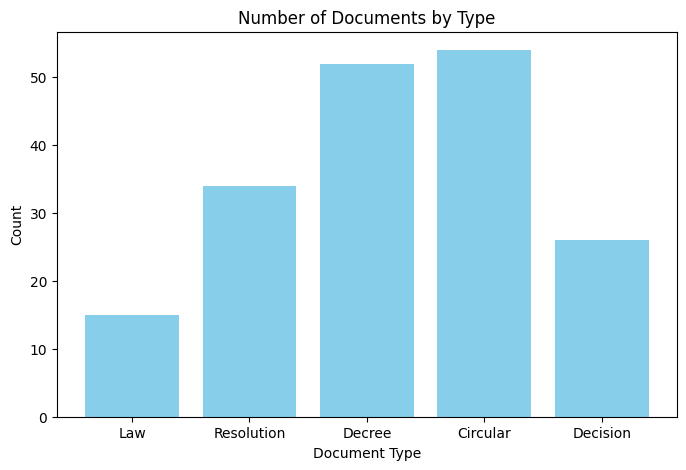

In [6]:
import matplotlib.pyplot as plt

labels = list(type_count.keys())
values = list(type_count.values())

plt.figure(figsize=(8,5))
plt.bar(labels, values, color='skyblue')
plt.xlabel('Document Type')
plt.ylabel('Count')
plt.title('Number of Documents by Type')
plt.show()

In [40]:
text = read_drive_file('nghi_dinh_102_2021_ND-CP_494746.pdf')

print(text)

CHÍNH PHỦ  
--------  CỘNG HÒA XÃ HỘI CHỦ NGHĨA VIỆT NAM  
Độc lập - Tự do - Hạnh phúc  
---------------  
Số: 102/2021/NĐ -CP Hà Nội, ngày 16 tháng 11 năm 2021  
  
NGHỊ ĐỊNH  
SỬA ĐỔI, BỔ SUNG MỘT SỐ ĐIỀU CỦA CÁC NGHỊ ĐỊNH VỀ XỬ PHẠT VI PHẠM 
HÀNH CHÍNH TRONG LĨNH VỰC THUẾ, HÓA ĐƠN; HẢI QUAN; KINH DOANH BẢO 
HIỂM, KINH DOANH XỔ SỐ; QUẢN LÝ, SỬ DỤNG TÀI SẢN CÔNG; THỰC HÀNH TIẾT 
KIỆM, CHỐNG LÃNG PHÍ; DỰ TRỮ QUỐC GIA; KHO BẠC NHÀ NƯỚC; KẾ TOÁN, 
KIỂM TOÁN ĐỘC LẬP  
Căn cứ Luật Tổ chức Chính phủ ngày 19 tháng 6 năm 2015;  
Căn cứ Luật sửa đổi, bổ sung một số điều của Luật Tổ chức Chính phủ và Luật Tổ chức chính 
quyền địa phương ngày 22 tháng 11 năm 2019;  
Căn cứ Luật Xử lý vi phạm hành chính ngày 20 tháng 6 năm 2012;  
Căn cứ Luật sửa đổi, bổ sung một số điều của Luật Xử lý vi phạm hành chính ngày 13 tháng 11 
năm 2020;  
Căn cứ Luật Quản lý thuế ngày 13 tháng 6 năm 2019;  
Căn cứ Luật Hải quan ngày 23 tháng 6 năm 2014;  
Căn cứ Luật Quản lý, sử dụng tài sản công ngày 21 tháng 6 năm 2

In [ ]:
# folder = 'D:/Study/Education/Projects/Group_Project/source/document/original_doc/thong_tu'
# files = os.listdir(folder)
# files = [f'{folder}/{file}' for file in files]
# doc_count = 0
# pdf_count = 0

# for file in files:
#     doc_to_docx(file)
#     count += 1
    
# for file in files:
#     if file.endswith('doc'):
#         os.remove(file)
        # docx_to_pdf(file, file.replace('docx', 'pdf'))
        # count += 1
